In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
data=pd.read_csv('./vdjdb.txt',sep='\t', header=0)

data

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no


In [2]:
columns_to_drop = ['v.segm','j.segm','reference.id', 'method', 'meta','cdr3fix','web.method','web.method.seq','web.cdr3fix.nc','web.cdr3fix.unmp','mhc.a','mhc.b','mhc.class']

In [3]:
data.drop(columns=columns_to_drop, inplace=True)

In [4]:
data

,complex.id,gene,cdr3,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
3,2,TRA,CAVPSGAGSYQLTF,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,HomoSapiens,PQQPFPQPEQPFP,Gluten,Wheat,0
92767,30593,TRA,CAPQGATNKLIF,HomoSapiens,PQQPFPQPEQPFP,Gluten,Wheat,2
92768,30593,TRB,CASSLGAGGQETQYF,HomoSapiens,PQQPFPQPEQPFP,Gluten,Wheat,2
92769,30594,TRA,CLVGGSGGYNKLIF,HomoSapiens,PQQPFPQPEQPFP,Gluten,Wheat,0


In [5]:
# Print first 5 rows of the dataframe
data.head(5)

,complex.id,gene,cdr3,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
3,2,TRA,CAVPSGAGSYQLTF,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,HomoSapiens,FLKEKGGL,Nef,HIV-1,2


In [6]:
# Print last 5 rows of the dataframe
data.tail(5)

,complex.id,gene,cdr3,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
92766,30592,TRB,CASSPGQGGDNEQFF,HomoSapiens,PQQPFPQPEQPFP,Gluten,Wheat,0
92767,30593,TRA,CAPQGATNKLIF,HomoSapiens,PQQPFPQPEQPFP,Gluten,Wheat,2
92768,30593,TRB,CASSLGAGGQETQYF,HomoSapiens,PQQPFPQPEQPFP,Gluten,Wheat,2
92769,30594,TRA,CLVGGSGGYNKLIF,HomoSapiens,PQQPFPQPEQPFP,Gluten,Wheat,0
92770,30594,TRB,CASSSTAQETQYF,HomoSapiens,PQQPFPQPEQPFP,Gluten,Wheat,0


In [7]:
data['cdr3'].value_counts()

CASSIRSSYEQYF        361
CAASETSYDKVIF        157
CASSWGGGSHYGYTF      154
CAIGPGNMLTF          153
CAGGGSQGNLIF         144
                    ... 
CAENISNAGNMLTF         1
CASSPGQGSEQYF          1
CAGSYSGGGADGLTF        1
CASSLEAGYRDTDTQYF      1
CASSSTAQETQYF          1
Name: cdr3, Length: 68994, dtype: int64

In [8]:
data['species'].value_counts()

HomoSapiens      85329
MusMusculus       5323
MacacaMulatta     2119
Name: species, dtype: int64

In [9]:
data['antigen.epitope'].value_counts()

KLGGALQAK     27948
GILGFVFTL     10024
NLVPMVATV      8004
AVFDRKSDAK     3546
RAKFKQLL       2756
              ...  
SSSKLWAQY         1
TLVPQEHYV         1
SFLPGVYSV         1
RYLALYNKY         1
IPIQASLSF         1
Name: antigen.epitope, Length: 1169, dtype: int64

In [10]:
data['antigen.gene'].value_counts()

IE1        28150
M          10099
pp65        9331
EBNA4       5032
Spike       4507
           ...  
CADPS2         1
RNF10          1
ZFYVE27        1
SNX24          1
KARS           1
Name: antigen.gene, Length: 268, dtype: int64

In [11]:
data['antigen.species'].value_counts()

CMV                          38345
InfluenzaA                   15182
EBV                          11440
SARS-CoV-2                   10133
HomoSapiens                   5095
HIV-1                         3554
HCV                           2359
SIV                           2119
MCMV                          1463
YFV                            789
Wheat                          301
PlasmodiumBerghei              245
HTLV-1                         234
DENV1                          182
DENV3/4                        179
HIV                            162
HSV-2                          154
LCMV                           151
RSV                            125
synthetic                       92
VSV                             66
M.tuberculosis                  64
DENV2                           60
HCoV-HKU1                       57
TriticumAestivum                53
MusMusculus                     50
HPV                             28
GallusGallus                    16
AdV                 

In [12]:
data['vdjdb.score'].value_counts()

0    80357
1     8329
2     2336
3     1749
Name: vdjdb.score, dtype: int64

In [13]:
data.isna().sum()

complex.id          0
gene                0
cdr3                0
species             0
antigen.epitope     0
antigen.gene       62
antigen.species     0
vdjdb.score         0
dtype: int64

In [14]:
df_original = data

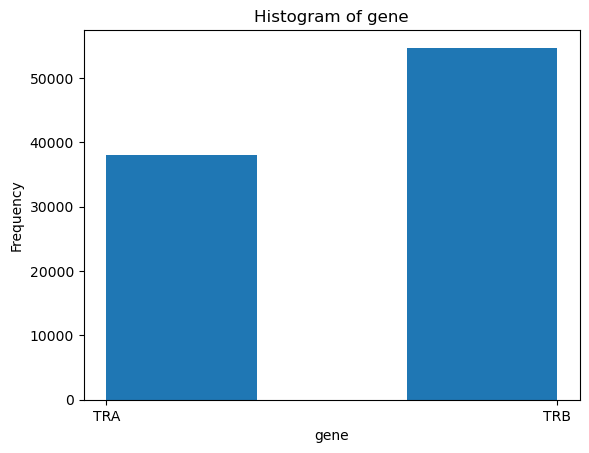

In [15]:
import matplotlib.pyplot as plt

plt.hist(data['gene'], bins=3)  # 可以调整bin的数量
plt.xlabel('gene')
plt.ylabel('Frequency')
plt.title('Histogram of gene')
plt.show()


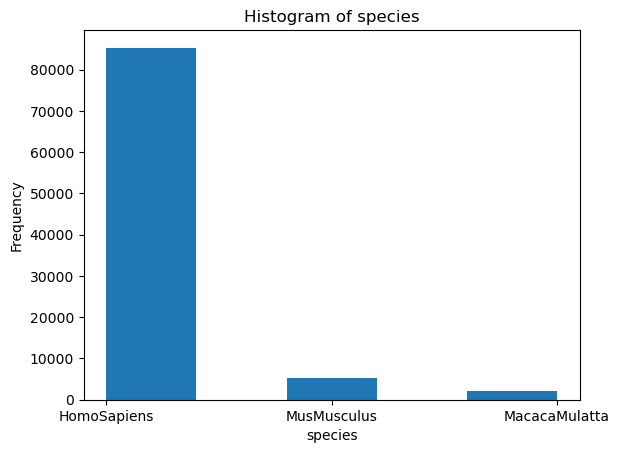

In [16]:
import matplotlib.pyplot as plt

plt.hist(data['species'], bins=5)  # 可以调整bin的数量
plt.xlabel('species')
plt.ylabel('Frequency')
plt.title('Histogram of species')
plt.show()


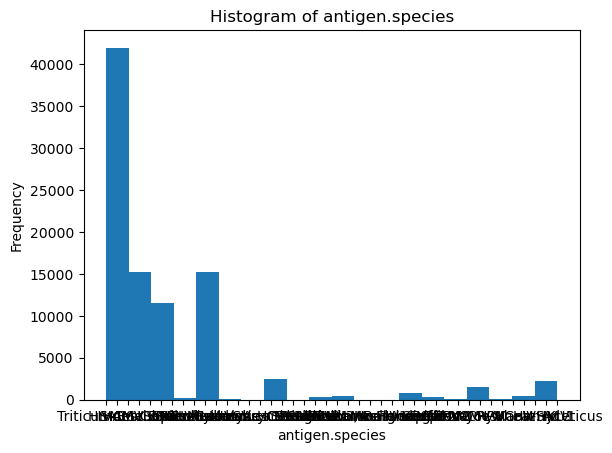

In [17]:
import matplotlib.pyplot as plt

plt.hist(data['antigen.species'], bins=20)  # 可以调整bin的数量
plt.xlabel('antigen.species')
plt.ylabel('Frequency')
plt.title('Histogram of antigen.species')
plt.show()

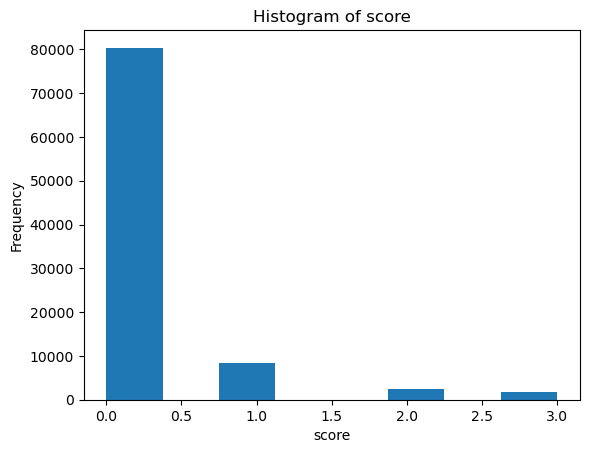

In [18]:
import matplotlib.pyplot as plt

plt.hist(data['vdjdb.score'], bins=8)  # 可以调整bin的数量
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Histogram of score')
plt.show()

In [19]:
# Filter rows where gene is TRA and species is TMacacaMulatta
df = data[(data['gene'] == 'TRA') & (data['species'] == 'MacacaMulatta')]

# Display the filtered data
print(df)



       complex.id gene              cdr3        species antigen.epitope  \
83675           0  TRA      CVLRAGGGYVLT  MacacaMulatta        TTPESANL   
83676           0  TRA    CAVGNTGGTIDKLT  MacacaMulatta        TTPESANL   
83677           0  TRA       CAGRSNNDRVI  MacacaMulatta        TTPESANL   
83678           0  TRA  CAVRGSGTTDSWGKLC  MacacaMulatta        TTPESANL   
83679           0  TRA    CVLRSASGGGYVLT  MacacaMulatta        TTPESANL   
...           ...  ...               ...            ...             ...   
83757           0  TRA      CVLRAGGGYVLT  MacacaMulatta        TTPESANL   
83758           0  TRA      CVLRATGNYKYI  MacacaMulatta        TTPESANL   
83759           0  TRA      CVLRAVNNNDIR  MacacaMulatta        TTPESANL   
83760           0  TRA       CVLRGNANKLI  MacacaMulatta        TTPESANL   
83761           0  TRA       CVLRSGVNNLF  MacacaMulatta        TTPESANL   

      antigen.gene antigen.species  vdjdb.score  
83675          Tat             SIV            1  

In [20]:
columns_to_drop = ['gene','complex.id','antigen.epitope', 'antigen.gene','antigen.species','vdjdb.score','species']

In [21]:
df.drop(columns=columns_to_drop, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17432\1815351204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


In [22]:
df

,cdr3
83675,CVLRAGGGYVLT
83676,CAVGNTGGTIDKLT
83677,CAGRSNNDRVI
83678,CAVRGSGTTDSWGKLC
83679,CVLRSASGGGYVLT
...,...
83757,CVLRAGGGYVLT
83758,CVLRATGNYKYI
83759,CVLRAVNNNDIR
83760,CVLRGNANKLI


In [23]:
df.to_csv('TRA_MacacaMulatta.csv')